# Perceptron

Installed libraries: ``numpy``, ``pandas``, ``matplotlib``, and ``watermark``

If not you can use conda:\
``!conda install numpy pandas matplotlib --yes``\
``!conda install watermark --yes``

In [52]:
%load_ext watermark
%watermark -v -p numpy,pandas,matplotlib,torch 

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.9.19
IPython version      : 8.15.0

numpy     : 1.26.4
pandas    : 2.2.1
matplotlib: 3.8.4
torch     : 2.2.0



# Loading the dataset with pandas

In [53]:
import pandas as pd

df = pd.read_csv("dataset/perceptron_data.txt", sep="\t")
df

,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-1.84,-1.13,0
...,...,...,...
95,0.71,2.27,1
96,1.96,0.83,1
97,2.52,1.83,1
98,2.77,2.82,1


Variable x_train stores the feautre columns, variable y_train stores the labels.

In [54]:
x_train = df[["x1","x2"]].values  # array 
y_train = df["label"].values      # vector (1 dim. array)
#x_train
#y_train

In [55]:
# Check the dimensions
x_train.shape

(100, 2)

In [56]:
# Check the dimensions
y_train.shape

(100,)

In [57]:
import numpy as np

#np.bincount(y_train)

values, counts = np.unique(y_train, return_counts=True)
print("values:", values)
print("values:", counts)

#y_train

values: [0 1]
values: [50 50]


# Visualization of the data set

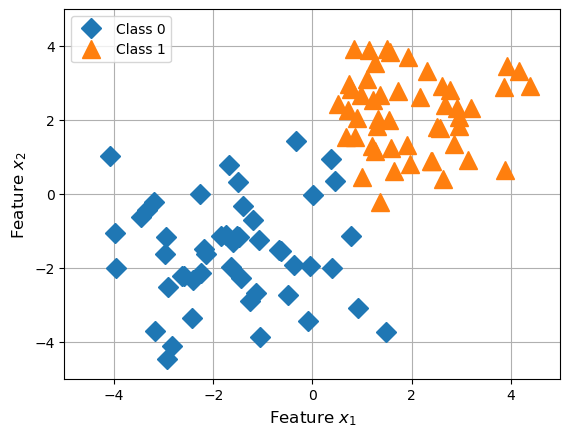

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(
  x_train[y_train == 0, 0],
  x_train[y_train == 0, 1],
  marker = "D",
  markersize = 10,
  linestyle = "",
  label = "Class 0"
)

plt.plot(
  x_train[y_train == 1, 0],
  x_train[y_train == 1, 1],
  marker = "^",
  markersize = 13,
  linestyle = "",
  label = "Class 1"
)

plt.legend(loc=2)

plt.xlim([-5,5])
plt.ylim([-5,5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()

# Defining the Perceptron model

![Perceptrion model](images/perceptron.png)

In [59]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class Perceptron:

    # initialize the perceptrion's model
    def __init__(self, num_features) :
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0.0

    # compute the weigted sum (computation part)
    def forward(self, x) :
        weighted_sum_z = self.bias
        for i, _ in enumerate(self.weights) :
            weighted_sum_z += x[i] * self.weights[i]

        if weighted_sum_z > 0.0 :
            prediction = 1
        else :
            prediction = 0

        return prediction
    
    # update method that enables the perceptron to learn
    def update(self, x, true_y) :
        prediction = self.forward(x)
        error = true_y - prediction

        self.bias += error
        for i, _ in enumerate(self.weights) :
            self.weights[i] += error * x[i]
        
        return error

In [60]:
ppn = Perceptron(num_features=2)
print("Percepton model initial weigths", ppn.weights)
print("Percepton model initial bias", ppn.bias)

x = [1.1, 2.1]
print("Computation with input", x, "results", ppn.forward(x))

ppn.update(x, true_y=1)
print("Percepton model epoch #1 weigths", ppn.weights)
print("Percepton model epoch #1 bias", ppn.bias)

Percepton model initial weigths [0.0, 0.0]
Percepton model initial bias 0.0
Computation with input [1.1, 2.1] results 0
Percepton model epoch #1 weigths [1.1, 2.1]
Percepton model epoch #1 bias 1.0


## Training the Perceptron

In [61]:
def train(model, all_x, all_y, epochs) :
    for epoch in range(epochs) :
        error_count = 0

        for x, y in zip(all_x, all_y) :
            error = model.update(x, y)
            error_count += abs(error)

        print(f"Epoch #{epoch+1} errors {error_count}")

ppn = Perceptron(num_features=2)
train(model=ppn, all_x=x_train, all_y=y_train, epochs=100)

print("Percepton model final weigths", ppn.weights)
print("Percepton model final bias", ppn.bias)


Epoch #1 errors 1
Epoch #2 errors 6
Epoch #3 errors 2
Epoch #4 errors 2
Epoch #5 errors 1
Epoch #6 errors 0
Epoch #7 errors 0
Epoch #8 errors 0
Epoch #9 errors 0
Epoch #10 errors 0
Epoch #11 errors 0
Epoch #12 errors 0
Epoch #13 errors 0
Epoch #14 errors 0
Epoch #15 errors 0
Epoch #16 errors 0
Epoch #17 errors 0
Epoch #18 errors 0
Epoch #19 errors 0
Epoch #20 errors 0
Epoch #21 errors 0
Epoch #22 errors 0
Epoch #23 errors 0
Epoch #24 errors 0
Epoch #25 errors 0
Epoch #26 errors 0
Epoch #27 errors 0
Epoch #28 errors 0
Epoch #29 errors 0
Epoch #30 errors 0
Epoch #31 errors 0
Epoch #32 errors 0
Epoch #33 errors 0
Epoch #34 errors 0
Epoch #35 errors 0
Epoch #36 errors 0
Epoch #37 errors 0
Epoch #38 errors 0
Epoch #39 errors 0
Epoch #40 errors 0
Epoch #41 errors 0
Epoch #42 errors 0
Epoch #43 errors 0
Epoch #44 errors 0
Epoch #45 errors 0
Epoch #46 errors 0
Epoch #47 errors 0
Epoch #48 errors 0
Epoch #49 errors 0
Epoch #50 errors 0
Epoch #51 errors 0
Epoch #52 errors 0
Epoch #53 errors 0
Ep